[[ 1.9643  4.5957]
 [ 2.2753  3.8589]
 [ 2.9781  4.5651]
 [ 2.932   3.5519]
 [ 3.5772  2.856 ]]
[[1]
 [1]
 [1]
 [1]
 [1]]


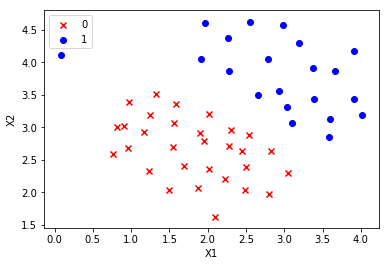

In [1]:
#本文是svm分类器，使用的sklearn库函数
#load data
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
#导入数据并且可视化
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y']
print X[:5]
print y[:5]

label0 = np.where(y.ravel() == 0)
plt.scatter(X[label0,0],X[label0,1],marker='x',color = 'r',label = '0')
label1 = np.where(y.ravel() == 1)
plt.scatter(X[label1,0],X[label1,1],marker='o',color = 'b',label = '1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()




In [26]:
#Training Linear SVM on dataset1
from sklearn import svm
#linearSVC,C越大，方差越大，容易过拟合，C越小，偏差越大，容易欠拟合
C = 1.0 # SVM regularization parameter
clf = svm.LinearSVC(C=C) #model
clf.fit(X,y.ravel()) #train


#看一下训练的准确率
y1_pred = clf.predict(X)
acc_train = np.mean(y1_pred==y.ravel())
print "the accuracy of train data set : ",acc_train






the accuracy of train data set :  0.980392156863


In [3]:
# 咱们先定义一个函数来画决策边界  
def plot_decision_boundary1(pred_func,X,y):  
  
    # 设定最大最小值，附加一点点边缘填充  
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1  
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1  
    h = 0.01  
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  
  
    # 用预测函数预测一下  
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])  
    Z = Z.reshape(xx.shape)  
    #plt.xlim(x_min,x_max)
    #plt.ylim(y_min,y_max)
    # 然后画出图  
    plt.contour(xx, yy, Z, )  
    plt.scatter(X[:, 0], X[:, 1], c=y) 
    
    # 咱们先顶一个函数来画决策边界  
def plot_decision_boundary(pred_func,X,y):  
  
    # 设定最大最小值，附加一点点边缘填充  
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
    h = 0.01  
  
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  
  
    # 用预测函数预测一下  
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])  
    Z = Z.reshape(xx.shape)  
  
    # 然后画出图 ,带有背景色 
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)  
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, alpha=0.8)  
    
    

    

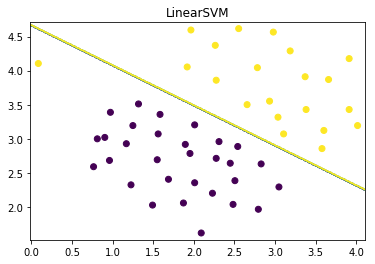

In [5]:
plot_decision_boundary1(lambda x:clf.predict(x),X,y)
plt.title("LinearSVM")  
plt.show()

[[ 0.107143   0.60307  ]
 [ 0.093318   0.649854 ]
 [ 0.0979263  0.705409 ]
 [ 0.15553    0.784357 ]
 [ 0.210829   0.866228 ]]
[[1]
 [1]
 [1]
 [1]
 [1]]


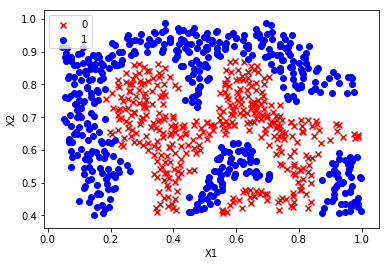

In [7]:
#load data2
data2 = sio.loadmat('ex6data2.mat')
X2 = data2['X']
y2 = data2['y']
print X2[:5]
print y2[:5]

label0 = np.where(y2.ravel() == 0)
plt.scatter(X2[label0,0],X2[label0,1],marker='x',color = 'r',label = '0')
label1 = np.where(y2.ravel() == 1)
plt.scatter(X2[label1,0],X2[label1,1],marker='o',color = 'b',label = '1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()


In [17]:
#Training SVM with RBF Kernel (Dataset 2)
#这里需要注意一下，在高斯核函数中，参数sigma  与RBF核函数中的gamma，
# 关系是：gamma= 1/2*(sigma**2)  所以当sigma =0.1 ，gamma= 50
from sklearn import svm
clf2 = svm.SVC(kernel='rbf',gamma=50,C=1.0)
clf2.fit(X2,y2.ravel())

#看一下训练的准确率
y2_pred = clf2.predict(X2)
acc_train = np.mean(y2_pred==y2.ravel())
print "the accuracy of train data set : ",acc_train




the accuracy of train data set :  0.989571263036


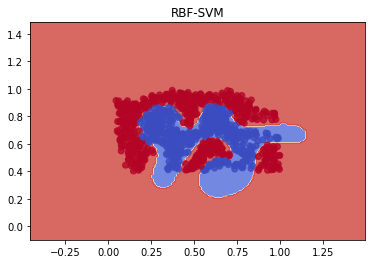

In [18]:
#可视化一下，决策边界

plot_decision_boundary(lambda x:clf2.predict(x),X2,y2)
plt.title("RBF-SVM")  
plt.show()


[[-0.158986  0.423977]
 [-0.347926  0.47076 ]
 [-0.504608  0.353801]
 [-0.596774  0.114035]
 [-0.518433 -0.172515]]
[[1]
 [1]
 [1]
 [1]
 [1]]


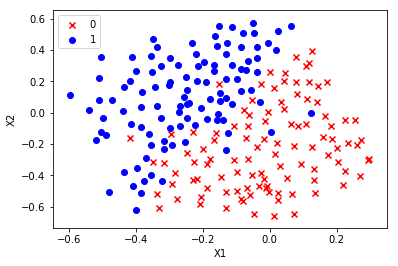

In [21]:
#load data3
data3 = sio.loadmat('ex6data3.mat')
X3 = data3['X']
y3 = data3['y']
Xval = data3['Xval']
yval = data3['yval']
print X3[:5]
print y3[:5]

label0 = np.where(y3.ravel() == 0)
plt.scatter(X3[label0,0],X3[label0,1],marker='x',color = 'r',label = '0')
label1 = np.where(y3.ravel() == 1)
plt.scatter(X3[label1,0],X3[label1,1],marker='o',color = 'b',label = '1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.show()


In [23]:
#Training SVM with RBF Kernel (Dataset 3)
#sigma = 0.1，那么gamma = 50
from sklearn import svm
clf3 = svm.SVC(kernel='rbf',gamma=50,C=1.0)
clf3.fit(X3,y3.ravel())

#看一下训练集合以及验证集合的准确率 
# 这里我就没有用交叉验证了，直接用的实验的结果c=1,sigma=0.1。
# 读者当然可以试试实现交叉验证，选择合适的超参数值
y3_pred = clf3.predict(X3)
yval_pred = clf3.predict(Xval)
acc_train = np.mean(y3_pred==y3.ravel())
acc_val = np.mean(yval_pred==yval.ravel())
print "the accuracy of train data set : ",acc_train
print "the accuracy of validation data set : ",acc_val

#总结一下：
# C越大：高方差，低偏差
# sigma越小==gamma越大：高方差，低偏差

the accuracy of train data set :  0.947867298578
the accuracy of validation data set :  0.965


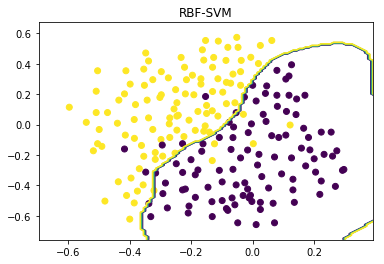

In [24]:
#可视化一下决策边界
plot_decision_boundary1(lambda x:clf3.predict(x),X3,y3)
plt.title("RBF-SVM")  
plt.show()


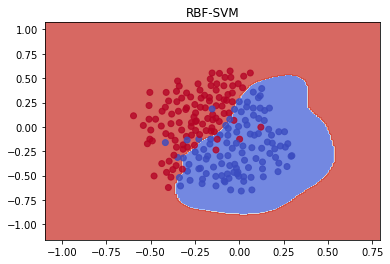

In [25]:
#可视化一下
plot_decision_boundary(lambda x:clf3.predict(x),X3,y3)
plt.title("RBF-SVM")  
plt.show()